# Multi Label Classification using Neural Network

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
import re

In [128]:
from matplotlib import pyplot as plt

In [129]:
from __future__ import division

In [130]:
df = pd.read_csv('data.csv')

In [131]:
df.shape

(10000, 9)

In [132]:
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

In [133]:
train.dtypes

Unnamed: 0        int64
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [134]:
train.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
9069,9069,1824e44e88f69d1d,please reply here on your talk page by adding,0,0,0,0,0,0
2603,2603,06f76f3f46dc372c,I would also like to say \n\nthat not only are...,1,0,0,0,1,0
7738,7738,1496879836ab883f,Here are some quotes from Maudoodi's book. Obv...,0,0,0,0,0,0
1579,1579,043dcdf6dee5b882,"It is too long in places, goes into trivia, ye...",0,0,0,0,0,0
5058,5058,0d698e07c775e149,"""\n\n Whole Ariticle Needs to br Rewritten \n\...",0,0,0,0,0,0


In [135]:
train.describe()

,Unnamed: 0,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,5034.586286,0.095571,0.010286,0.054571,0.003429,0.050286,0.009857
std,2884.892710,0.294024,0.100903,0.227158,0.058458,0.218550,0.098800
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2543.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5051.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7525.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [137]:
unlabelled_in_all = train[(train['toxic']!=1) & (train['severe_toxic']!=1) & (train['obscene']!=1) & 
                            (train['threat']!=1) & (train['insult']!=1) & (train['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', (len(unlabelled_in_all)/len(train))*100)

('Percentage of unlabelled comments is ', 89.71428571428571)


In [138]:
len(unlabelled_in_all)

6280

In [139]:
len(train)

7000

In [140]:
len(unlabelled_in_all)/len(train)

0.8971428571428571

In [141]:
# check for any 'null' comment
no_comment = train[train['comment_text'].isnull()]
len(no_comment)

0

In [142]:
no_comment = test[test['comment_text'].isnull()]
no_comment

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [143]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test)))
print('Total rows in train is {}'.format(len(train)))
print(train[cols_target].sum())


Total rows in test is 3000
Total rows in train is 7000
toxic            669
severe_toxic      72
obscene          382
threat            24
insult           352
identity_hate     69
dtype: int64


In [144]:
# Let's look at the character length for the rows in the training data and record these
train['char_length'] = train['comment_text'].apply(lambda x: len(str(x)))

/home/crayondata.com/sundararaman/Downloads/clear/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


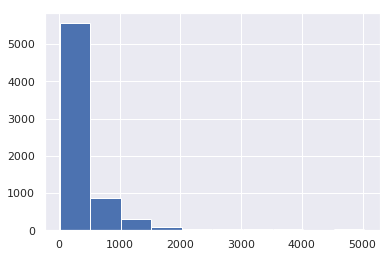

In [145]:
# look at the histogram plot for text length
sns.set()
train['char_length'].hist()
plt.show()

In [146]:
data = train[cols_target]

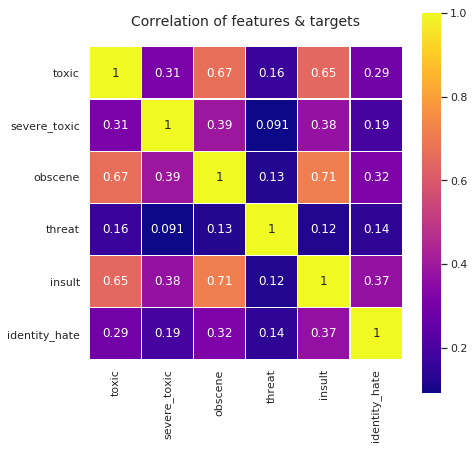

In [147]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [148]:
test['char_length'] = test['comment_text'].apply(lambda x: len(str(x)))

/home/crayondata.com/sundararaman/Downloads/clear/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


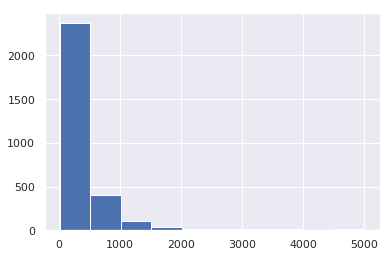

In [149]:
plt.figure()
plt.hist(test['char_length'])
plt.show()

In [150]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [151]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train['comment_text'] = train['comment_text'].map(lambda com : clean_text(com))

/home/crayondata.com/sundararaman/Downloads/clear/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [152]:
# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test['comment_text'] = test['comment_text'].map(lambda com : clean_text(com))

/home/crayondata.com/sundararaman/Downloads/clear/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [153]:
train = train.drop('char_length',axis=1)

In [154]:
X = train.comment_text
test_X = test.comment_text

In [155]:
print(X.shape, test_X.shape)

((7000,), (3000,))


In [156]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [157]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<7000x5000 sparse matrix of type '<type 'numpy.float64'>'
	with 141135 stored elements in Compressed Sparse Row format>

In [158]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<3000x5000 sparse matrix of type '<type 'numpy.float64'>'
	with 59060 stored elements in Compressed Sparse Row format>

In [159]:
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [160]:
max_features = 20000
maxlen = 100

In [161]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))

In [162]:
list_tokenized_train = tokenizer.texts_to_sequences(X)
list_tokenized_test = tokenizer.texts_to_sequences(test_X)

In [163]:
X_t = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = sequence.pad_sequences(list_tokenized_test, maxlen=maxlen)

In [164]:
def get_model():
    embed_size = 128
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [165]:
model = get_model()

In [166]:
batch_size = 32
epochs = 2

In [167]:
file_path="weights_base.best.hdf5"

In [168]:
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [169]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=20)

In [170]:
callbacks_list = [checkpoint, early] #early

In [171]:
model.fit(X_t, data, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=callbacks_list)

Train on 6300 samples, validate on 700 samples
Epoch 1/2
6300/6300 [==============================] - 113s 18ms/step - loss: 0.1956 - acc: 0.9563 - val_loss: 0.1326 - val_acc: 0.9629

Epoch 00001: val_loss improved from inf to 0.13263, saving model to weights_base.best.hdf5
Epoch 2/2
6300/6300 [==============================] - 109s 17ms/step - loss: 0.1059 - acc: 0.9674 - val_loss: 0.0863 - val_acc: 0.9693

Epoch 00002: val_loss improved from 0.13263 to 0.08632, saving model to weights_base.best.hdf5


In [172]:
model.load_weights(file_path)

In [173]:
y_test = model.predict(X_te)

In [174]:
y_test

array([[2.6107473e-02, 1.1241110e-03, 6.7826710e-03, 3.8842642e-04,
        5.6572738e-03, 2.0839164e-03],
       [4.3735385e-01, 3.0408520e-02, 2.2889060e-01, 2.1804955e-02,
        2.2844681e-01, 5.1930927e-02],
       [6.2838405e-02, 3.4779350e-03, 2.2044314e-02, 1.4493191e-03,
        1.9348977e-02, 5.9713991e-03],
       ...,
       [1.2468710e-02, 6.4917642e-04, 4.1007781e-03, 1.9130395e-04,
        2.9724580e-03, 1.2326720e-03],
       [9.6075786e-03, 4.8635527e-04, 3.0201022e-03, 1.3846293e-04,
        2.2400750e-03, 9.6272881e-04],
       [3.5702962e-02, 2.2727360e-03, 1.2134789e-02, 7.9982943e-04,
        9.5391674e-03, 3.5548443e-03]], dtype=float32)

In [175]:
y_test_final = [[0 if cat < 0.7 else 1 for cat in row] for row in y_test]

In [176]:
output_df = pd.DataFrame(y_test_final, columns=cols_target)

In [177]:
output_df['id'] = test['id'].tolist()

In [178]:
output_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,id
0,0,0,0,0,0,0,10afda3f1a02b537
1,0,0,0,0,0,0,0c6be6145a931f1d
2,0,0,0,0,0,0,04aeb1bd39e3f350
3,0,0,0,0,0,0,0c964eb503dcce1d
4,0,0,0,0,0,0,0c08677a1fe3978f


In [179]:
pd.merge(test, output_df, on='id')

,Unnamed: 0,id,comment_text,toxic_x,severe_toxic_x,obscene_x,threat_x,insult_x,identity_hate_x,char_length,toxic_y,severe_toxic_y,obscene_y,threat_y,insult_y,identity_hate_y
0,6252,10afda3f1a02b537,revision of holocaust denial details hi there ...,0,0,0,0,0,0,498,0,0,0,0,0,0
1,4684,0c6be6145a931f1d,piss coming from my asss,1,0,1,0,0,0,25,0,0,0,0,0,0
2,1731,04aeb1bd39e3f350,please do not vandalize pages as you did with ...,0,0,0,0,0,0,135,0,0,0,0,0,0
3,4742,0c964eb503dcce1d,title why does the title use the article la,0,0,0,0,0,0,53,0,0,0,0,0,0
4,4521,0c08677a1fe3978f,request regarding current rfar clarification t...,0,0,0,0,0,0,2933,0,0,0,0,0,0
5,6340,10f33c2da53293d5,what identity is that dracula why is it that y...,0,0,0,0,0,0,125,0,0,0,0,0,0
6,576,01826b925ec100f7,4meter4 sigh and my concerns only because mr 4...,0,0,0,0,0,0,1712,0,0,0,0,0,0
7,5202,0ddaac898f866014,block of 204 184 95 250 i noticed you temporar...,0,0,0,0,0,0,215,0,0,0,0,0,0
8,6363,1107619e461ce5f3,read this im gonna troll you forever and ever ...,0,0,0,0,0,0,92,0,0,0,0,0,0
9,439,011e2c96cfa8a055,fucked with the wrong muchacho 21 19 july 23 2...,1,0,1,0,0,0,59,0,0,0,0,0,0
